In [28]:
# -*- coding: utf-8 -*-
# @Time    : 20-8-19
# @Author  : huangyue
# @FileName: EDA.ipynb

'''
 数据探索，查看数据类型，数据量，是否
 存在重复值，哪些列各有多少值，因变量列的分布
'''


import numpy as np
import pandas as pd

#data read 
train_data_path='/home/yue/Project/Datamining/tianchi/used_car/data/used_car_train_20200313.csv'
data=pd.read_csv(train_data_path,sep=' ') 


数据集大小:  (150000, 31)
取出数据前五行：
    SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
0       0     736  20040402   30.0      6       1.0       0.0      0.0     60   
1       1    2262  20030301   40.0      1       2.0       0.0      0.0      0   
2       2   14874  20040403  115.0     15       1.0       0.0      0.0    163   
3       3   71865  19960908  109.0     10       0.0       0.0      1.0    193   
4       4  111080  20120103  110.0      5       1.0       0.0      0.0     68   

   kilometer  ...       v_5       v_6       v_7       v_8       v_9      v_10  \
0       12.5  ...  0.235676  0.101988  0.129549  0.022816  0.097462 -2.881803   
1       15.0  ...  0.264777  0.121004  0.135731  0.026597  0.020582 -4.900482   
2       12.5  ...  0.251410  0.114912  0.165147  0.062173  0.027075 -4.846749   
3       15.0  ...  0.274293  0.110300  0.121964  0.033395  0.000000 -4.509599   
4        5.0  ...  0.228036  0.073205  0.091880  0.078819  0.121534 -1.896240

查看相关统计量：
                SaleID           name       regDate          model  \
count   150000.000000  150000.000000  1.500000e+05  149999.000000   
unique            NaN            NaN           NaN            NaN   
top               NaN            NaN           NaN            NaN   
freq              NaN            NaN           NaN            NaN   
mean     74999.500000   68349.172873  2.003417e+07      47.129021   
std      43301.414527   61103.875095  5.364988e+04      49.536040   
min          0.000000       0.000000  1.991000e+07       0.000000   
25%      37499.750000   11156.000000  1.999091e+07      10.000000   
50%      74999.500000   51638.000000  2.003091e+07      30.000000   
75%     112499.250000  118841.250000  2.007111e+07      66.000000   
max     149999.000000  196812.000000  2.015121e+07     247.000000   

                brand       bodyType       fuelType        gearbox  \
count   150000.000000  145494.000000  141320.000000  144019.000000   
unique            NaN


##读入数据后进行数据探索，查看数据大小、去除重复数据、查看数据格式、是否有缺失值、是否有异常值

In [30]:
print('数据集大小: ',data.shape)
print("取出数据前五行：\n",data.head())

print('是否存在重复数据,如果存在删除重复行：', set(data.duplicated()))
if set(data.duplicated()):
    data.drop_duplicates()
# 通过info和describe可以知道哪些列有数据缺失，考虑可能同时存在数值和字符型变量
print('查看相关统计量：\n', data.describe(include='all'))
print('查看列名和type：\n', data.info())

数据集大小:  (150000, 31)
取出数据前五行：
    SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
0       0     736  20040402   30.0      6       1.0       0.0      0.0     60   
1       1    2262  20030301   40.0      1       2.0       0.0      0.0      0   
2       2   14874  20040403  115.0     15       1.0       0.0      0.0    163   
3       3   71865  19960908  109.0     10       0.0       0.0      1.0    193   
4       4  111080  20120103  110.0      5       1.0       0.0      0.0     68   

   kilometer  ...       v_5       v_6       v_7       v_8       v_9      v_10  \
0       12.5  ...  0.235676  0.101988  0.129549  0.022816  0.097462 -2.881803   
1       15.0  ...  0.264777  0.121004  0.135731  0.026597  0.020582 -4.900482   
2       12.5  ...  0.251410  0.114912  0.165147  0.062173  0.027075 -4.846749   
3       15.0  ...  0.274293  0.110300  0.121964  0.033395  0.000000 -4.509599   
4        5.0  ...  0.228036  0.073205  0.091880  0.078819  0.121534 -1.896240

查看相关统计量：
                SaleID           name       regDate          model  \
count   150000.000000  150000.000000  1.500000e+05  149999.000000   
unique            NaN            NaN           NaN            NaN   
top               NaN            NaN           NaN            NaN   
freq              NaN            NaN           NaN            NaN   
mean     74999.500000   68349.172873  2.003417e+07      47.129021   
std      43301.414527   61103.875095  5.364988e+04      49.536040   
min          0.000000       0.000000  1.991000e+07       0.000000   
25%      37499.750000   11156.000000  1.999091e+07      10.000000   
50%      74999.500000   51638.000000  2.003091e+07      30.000000   
75%     112499.250000  118841.250000  2.007111e+07      66.000000   
max     149999.000000  196812.000000  2.015121e+07     247.000000   

                brand       bodyType       fuelType        gearbox  \
count   150000.000000  145494.000000  141320.000000  144019.000000   
unique            NaN

##这里的时间为int后续需要修改；bodytype\fueltype等分类变量这里为float或者int型。因为题目中给出信息说明有些type类型为分类变量，notRepairedDamage格式为object需要单独查看，其他变量是否能作为分类特征需要结合数据再判断

In [31]:
#将所有特征单独拿出来看统计唯一值，配合题目中给出的特征含义说明，确定分类特征
for feature in data.columns:
    #print(feature + "有：")
    print("{}特征有{}不同的值".format(feature,data[feature].nunique()))

SaleID特征有150000不同的值
name特征有99662不同的值
regDate特征有3894不同的值
model特征有248不同的值
brand特征有40不同的值
bodyType特征有8不同的值
fuelType特征有7不同的值
gearbox特征有2不同的值
power特征有566不同的值
kilometer特征有13不同的值
notRepairedDamage特征有3不同的值
regionCode特征有7905不同的值
seller特征有2不同的值
offerType特征有1不同的值
creatDate特征有96不同的值
price特征有3763不同的值
v_0特征有143997不同的值
v_1特征有143998不同的值
v_2特征有143997不同的值
v_3特征有143998不同的值
v_4特征有143998不同的值
v_5特征有139624不同的值
v_6特征有109766不同的值
v_7特征有138709不同的值
v_8特征有142451不同的值
v_9特征有140617不同的值
v_10特征有143997不同的值
v_11特征有143997不同的值
v_12特征有143997不同的值
v_13特征有143998不同的值
v_14特征有143998不同的值


###'SaleID','seller','offerType'可以删除，对任务无影响

###kilometer只有13个不同的值也是意外发现
###regDate和creatDate都是日期
###另外price只有3763个不同值，作为二手车的估价，它可能是以100为区间(根据数据显示也有50)



In [32]:
#先看一下kilometer和notRepairedDamage
print(data['kilometer'].unique())
print(data['notRepairedDamage'].unique())



[12.5 15.   5.  10.   2.   6.   3.   7.   8.   9.   4.   1.   0.5]
['0.0' '-' '1.0']


### kilometer应该是已经做过分桶了，特征工程可以考虑将power也做分桶
###notRepairedDamage中有-符号后续需要换掉
### power中有异常值，后续需要特殊处理

## 画出所有变量的分布图

In [33]:
#先处理notRepairedDamage，特殊字符-表示未知，这里用-1缺失
data['notRepairedDamage']=data['notRepairedDamage'].\
    replace('-','-1').astype('float').astype('int')


In [34]:
##处理缺失值,由上可以初步确定分类变量如下，缺失值用众数填充，分类变量转为int格式,方便画图，在特征工程时需要加入test数据
cat_features=['model','brand','bodyType','fuelType','gearbox','kilometer',
             'notRepairedDamage']
for fea in cat_features:
    data[fea]=data[fea].fillna(data[fea].mode().iloc[0]).astype('int')

In [35]:
%matplotlib inline


/home/yue/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


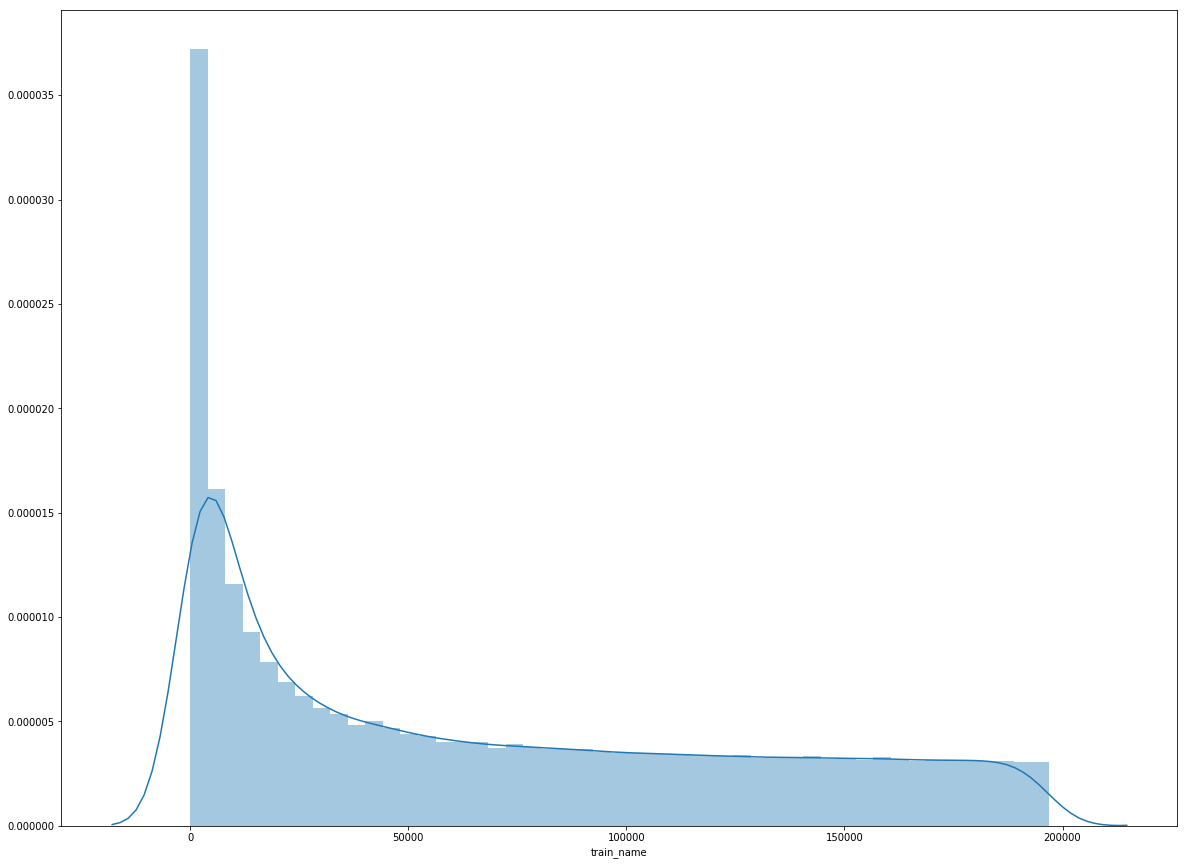

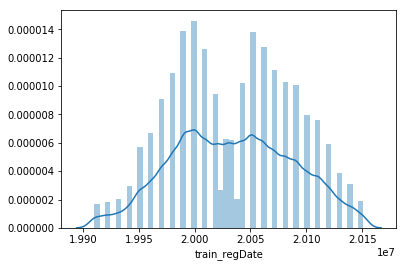

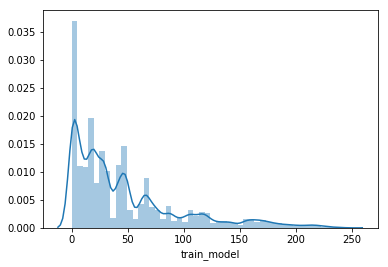

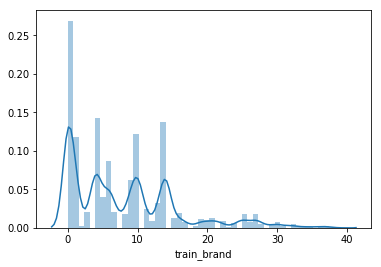

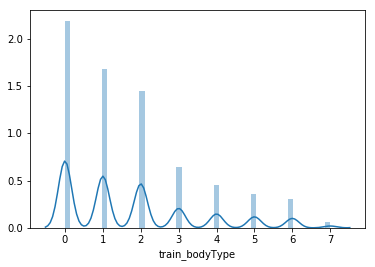

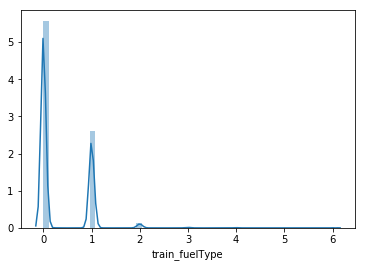

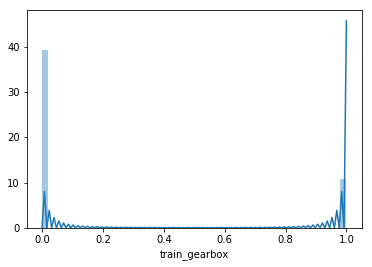

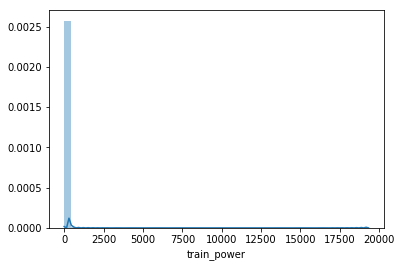

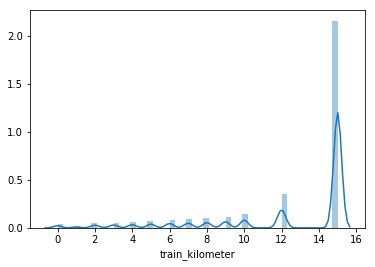

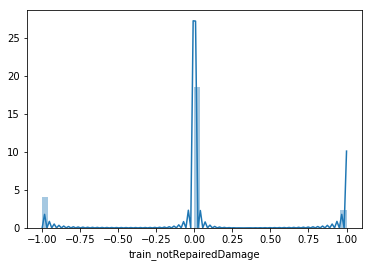

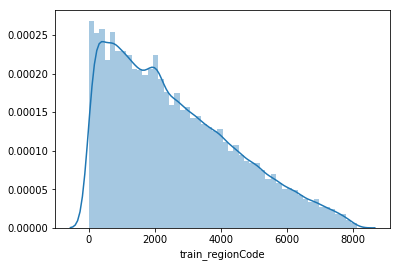

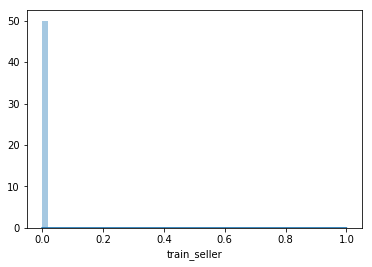

/home/yue/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/yue/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


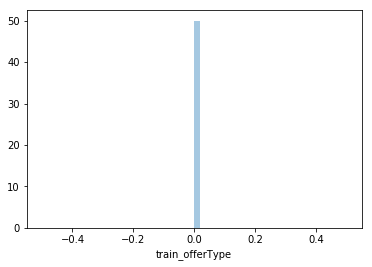

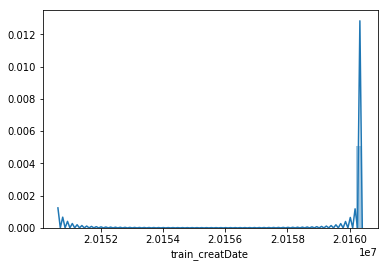

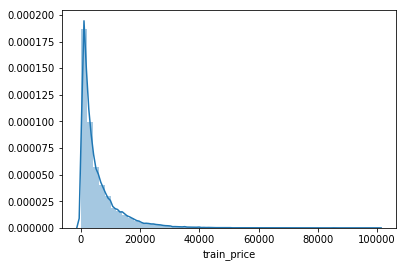

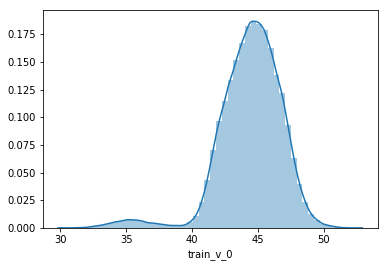

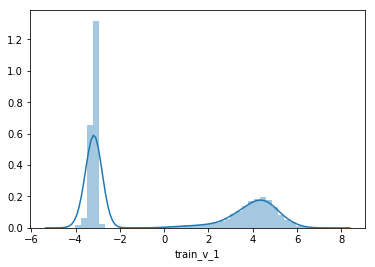

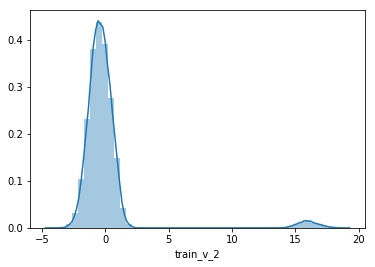

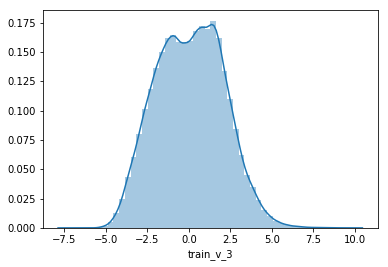

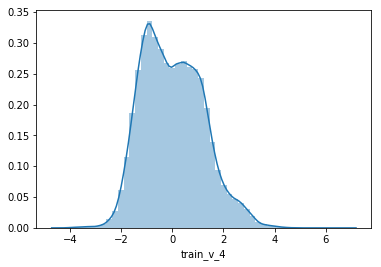

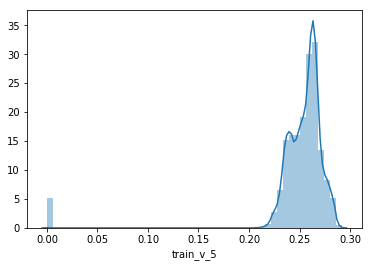

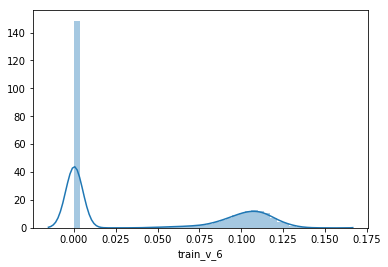

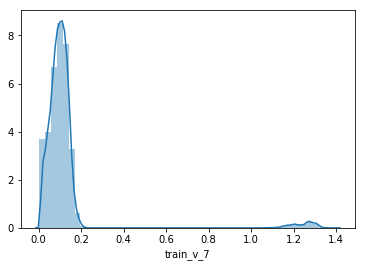

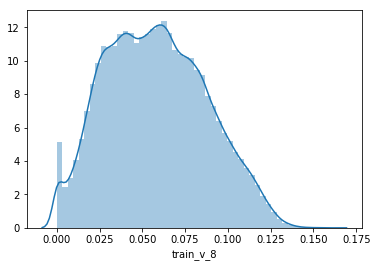

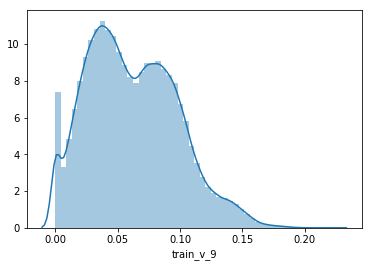

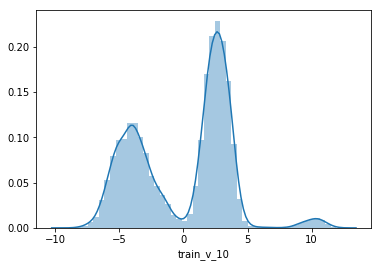

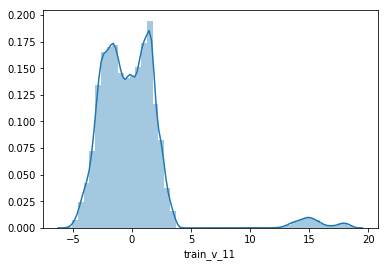

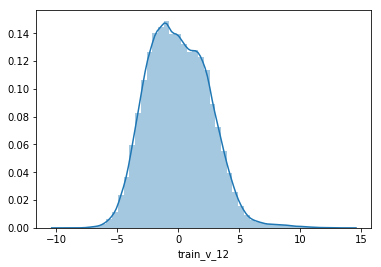

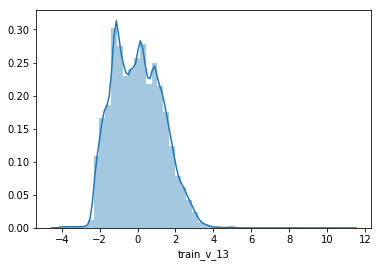

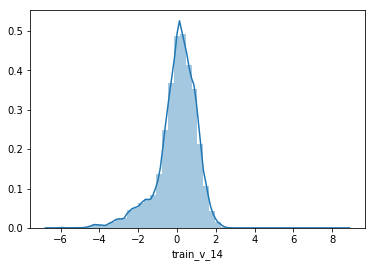

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
cols=list(data.columns)
cols=cols[1:]
plt.figure(figsize=(20,15))
i=1
for item  in cols:
    plt.subplot(1,1,i)
    sns.distplot(data['{}'.format(item)],axlabel='train_{}'.format(item))
    plt.show()

###price是个长尾分布，这里给它取个log

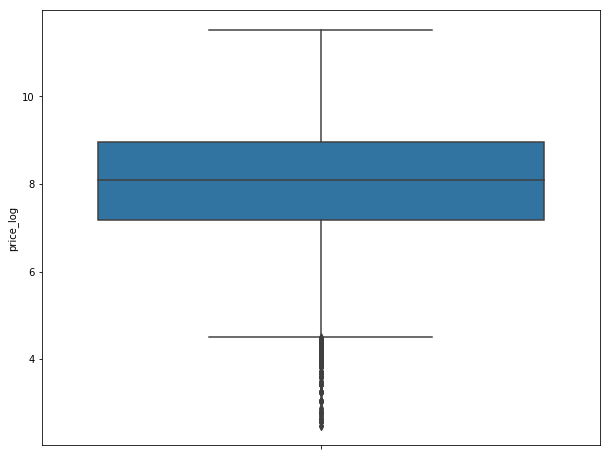

In [39]:
data['price_log']=data['price'].apply(np.log1p)
train_y=data['price_log']
Percentile = np.percentile(train_y,[0,25,50,75,100])
IQR = Percentile[3] - Percentile[1]
UpLimit = Percentile[3]+IQR.mean()*1.5
DownLimit = Percentile[1]-IQR.mean()*1.5
f,ax=plt.subplots(figsize=(10,8))
sns.boxplot(y=train_y,data=train_y,ax=ax)
plt.show()


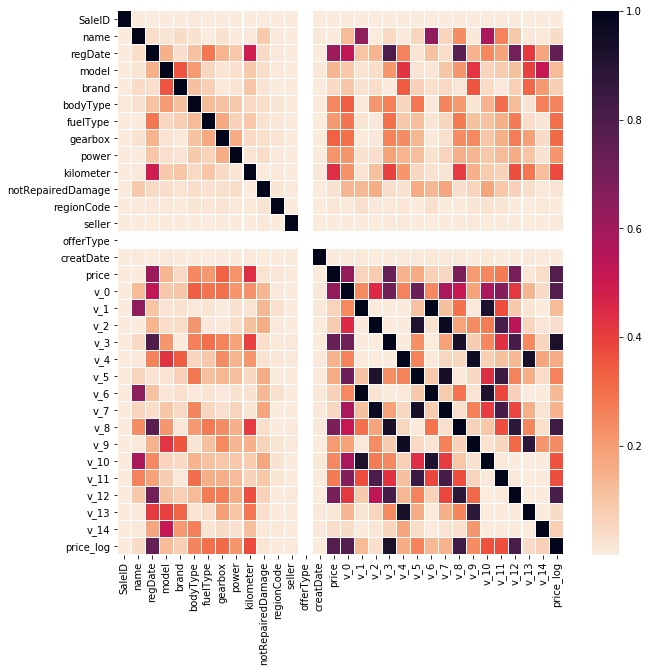

In [42]:
#画出各特征之间的相关性矩阵
corr = abs(data.corr())
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidths=0.1, cmap=sns.cm.rocket_r)

###可以看到regDate,kilometer,v_0,v_3,v_9,v_13与price相关性较大
###匿名特征中v_1,v_6,v_10相关性较强；v2,v_5,v_7,v_11相关性较强；v3,v8,v12相关性较强；v4,v9,v13相关性较强；




##虽然树模型对特征的分布的正态无要求，这里可以在特征工程时对几个特别的长尾分布做对数处理


In [44]:
##将数据存入
data.to_csv("/home/yue/Project/Datamining/tianchi/used_car/data/train_data_eda.csv")

###由eda可以知道，日期特征需要转化，类别特征的缺失值需要处理，notRepairedDamage有异常值需要处理，power存在超出范围的情况，model和brand存在于前几种，fuel_type主要是前两种

In [45]:
print(data.dtypes)

SaleID                 int64
name                   int64
regDate                int64
model                  int64
brand                  int64
bodyType               int64
fuelType               int64
gearbox                int64
power                  int64
kilometer              int64
notRepairedDamage      int64
regionCode             int64
seller                 int64
offerType              int64
creatDate              int64
price                  int64
v_0                  float64
v_1                  float64
v_2                  float64
v_3                  float64
v_4                  float64
v_5                  float64
v_6                  float64
v_7                  float64
v_8                  float64
v_9                  float64
v_10                 float64
v_11                 float64
v_12                 float64
v_13                 float64
v_14                 float64
price_log            float64
dtype: object
